In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


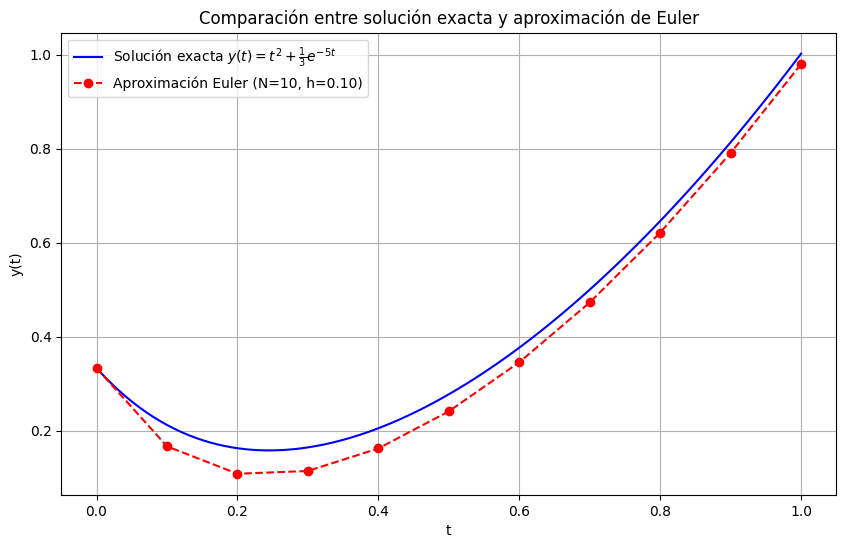

In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from src.ODE import ODE_euler

# Definición de la ecuación diferencial
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Parámetros del problema
a = 0.0  # tiempo inicial
b = 1.0  # tiempo final
y_t0 = 1/3  # condición inicial
N = 10  # número de pasos

# Solución con método de Euler
ys_euler, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Solución exacta
def y_exacta(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Puntos más finos para graficar la solución exacta suave
t_fine = np.linspace(a, b, 100)
y_fine = y_exacta(t_fine)

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_fine, 'b-', label='Solución exacta $y(t) = t^2 + \\frac{1}{3}e^{-5t}$')
plt.plot(ts, ys_euler, 'ro--', label=f'Aproximación Euler (N={N}, h={h:.2f})')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación entre solución exacta y aproximación de Euler')
plt.legend()
plt.grid(True)
plt.show()

# Errores
Calcule el error relativo para diferentes valores de N.

In [13]:
# Calcular error relativo
import numpy as np

# Función para calcular error relativo promedio
def error_relativo_promedio(ys_aprox, ys_exacta):
    errors = [abs((ex - ap)/ex) for ex, ap in zip(ys_exacta, ys_aprox) if ex != 0]
    return np.mean(errors)

# Valores de N a probar
Ns = [5, 10, 20, 50, 100, 200]
results = []

# Calculamos errores para cada N
for n in Ns:
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=n)
    ys_exacta = [y_exacta(t) for t in ts]
    err = error_relativo_promedio(ys, ys_exacta)
    results.append((n, h, err))
    
    print(f"N = {n:3d} | h = {h:.4f} | Error relativo promedio = {err:.4e}")

# Mostramos resultados en formato tabular
print("\nResumen de resultados:")
print("-"*60)
print(f"{'N':>5} | {'h':>10} | {'Error relativo promedio':>25}")
print("-"*60)
for n, h, err in results:
    print(f"{n:5d} | {h:10.4f} | {err:25.4e}")

N =   5 | h = 0.2000 | Error relativo promedio = 2.7979e-01
N =  10 | h = 0.1000 | Error relativo promedio = 1.2910e-01
N =  20 | h = 0.0500 | Error relativo promedio = 6.3146e-02
N =  50 | h = 0.0200 | Error relativo promedio = 2.5000e-02
N = 100 | h = 0.0100 | Error relativo promedio = 1.2462e-02
N = 200 | h = 0.0050 | Error relativo promedio = 6.2221e-03

Resumen de resultados:
------------------------------------------------------------
    N |          h |   Error relativo promedio
------------------------------------------------------------
    5 |     0.2000 |                2.7979e-01
   10 |     0.1000 |                1.2910e-01
   20 |     0.0500 |                6.3146e-02
   50 |     0.0200 |                2.5000e-02
  100 |     0.0100 |                1.2462e-02
  200 |     0.0050 |                6.2221e-03


## ¿Cuál es el valor de h?


In [16]:
a = 0.0  # Tiempo inicial
b = 1.0  # Tiempo final
N = 10   # Número de pasos

h = (b - a) / N
print(f"El valor de h para N = {N} es: {h}")

El valor de h para N = 10 es: 0.1
